In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_black_plate(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to separate white text from black background
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

    # Apply noise removal using median filtering
    median_filtered = cv2.medianBlur(binary_image, 3)
    
    # Apply morphological operations to clean up the image
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(median_filtered, cv2.MORPH_OPEN, kernel)
    binary_image = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

    return binary_image

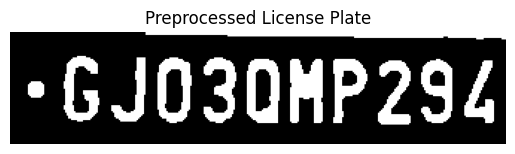

In [5]:
license_plate_img = cv2.imread('../images/input/plate4.png')

resized_img = cv2.resize(license_plate_img, (333, 75))
    
# Preprocess the image for black background and white text
preprocessed_img = preprocess_black_plate(resized_img)

# Display the preprocessed image
plt.imshow(preprocessed_img, cmap='gray')
plt.title('Preprocessed License Plate')
plt.axis('off')
plt.show()

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


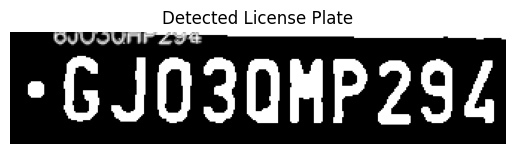

Detected License Plate: 6JO30HP294


In [10]:
import easyocr

reader = easyocr.Reader(['en'])

result = reader.readtext(preprocessed_img)

# Display the OCR result
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    preprocessed_img = cv2.putText(preprocessed_img, text, top_left, font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    
plt.imshow(preprocessed_img, cmap='gray')
plt.title('Detected License Plate')
plt.axis('off')
plt.show()

print('Detected License Plate:', result[0][1])